<a href="https://colab.research.google.com/github/Kanad-Pandey/Machine-Learning/blob/main/Decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt


# import some data to play with
iris = datasets.load_iris()


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
                                          'petal width (cm)', 'Species'])

df.head() # To view first 5 row

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [ ]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df["Species"]=df['Species'].str.replace("Iris-","")

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df["s_no"]=df["Species"]
df["s_no"]=df["s_no"].str.replace("setosa","1")
df["s_no"]=df["s_no"].str.replace("versicolor","2")
df["s_no"]=df["s_no"].str.replace("virginica","3")


In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,s_no
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
 5   s_no               150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.2+ KB


In [ ]:
df['s_no']=pd.to_numeric(df["s_no"],downcast="integer")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
 5   s_no               150 non-null    int8   
dtypes: float64(4), int8(1), object(1)
memory usage: 6.1+ KB


<ipython-input-176-8298b2d780b3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Spectral',annot=True)


<Axes: >

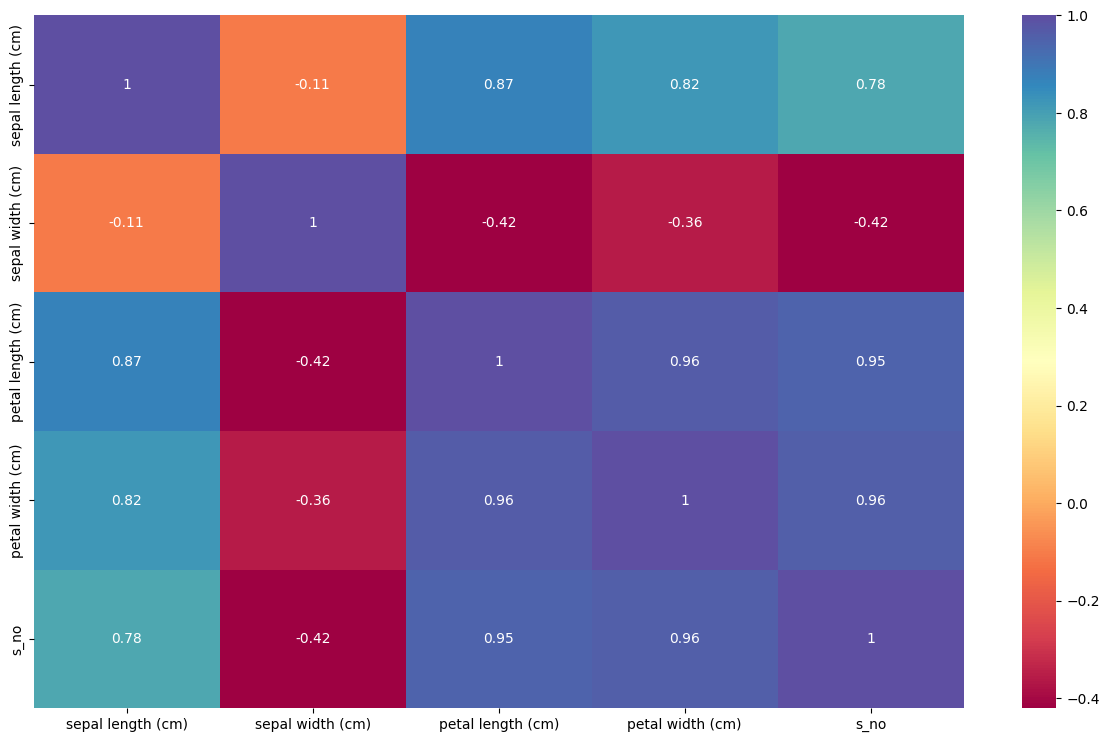

In [ ]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),cmap='Spectral',annot=True)

In [ ]:
df.drop(["petal length (cm)","s_no"],axis=1,inplace=True)


In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal width (cm),Species
0,5.1,3.5,0.2,setosa
1,4.9,3.0,0.2,setosa
2,4.7,3.2,0.2,setosa
3,4.6,3.1,0.2,setosa
4,5.0,3.6,0.2,setosa


In [ ]:
x=df.drop(["Species"],axis=1)
y=df.Species

In [ ]:
x.shape
y.shape

(150,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(max_depth=5,max_leaf_nodes=30)

In [ ]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=30)

In [ ]:
y_pred=dt_model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [ ]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [ ]:
from sklearn import tree
features=list(list(df.columns[:-1]))
targets=["setosa","versicolor","virginica"]

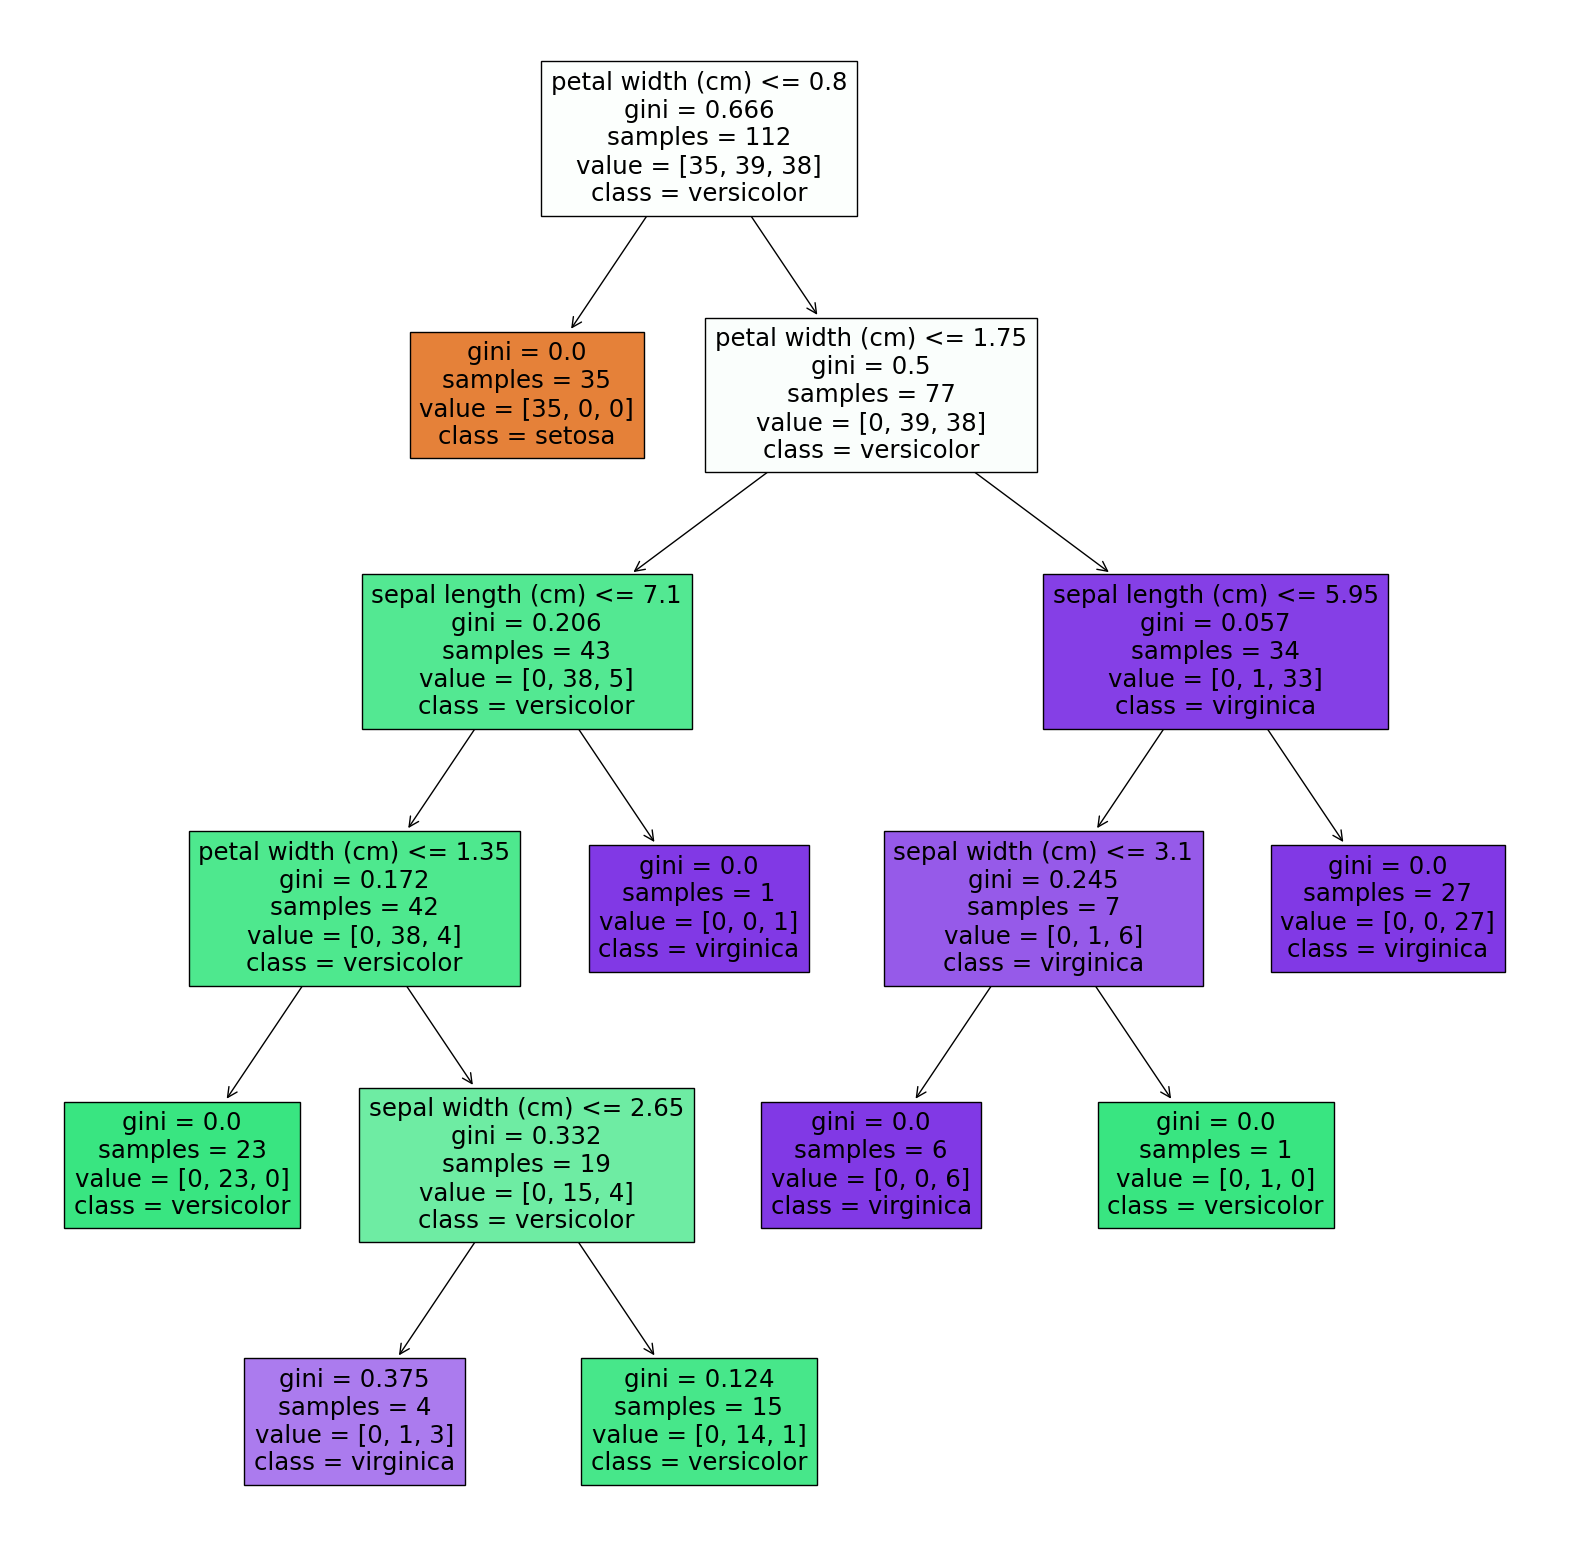

In [ ]:
plt.figure(figsize=(20,20))
tree2=tree.plot_tree(dt_model,filled=True,feature_names=features,class_names=targets)